## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
"Getting the shape of the dataframe to get the number of rows in the dataset"
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
"Get Unique Count of Users"
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
"Unique Users Converted divied by Total Unique Users should give proportion of the users converted"
df[ df['converted'] == 1]['user_id'].nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
"Number of treatment(experiment) users received old pages"
treatment_received_landing_page_count =  df.query('group == "treatment"').groupby(['landing_page']).count()['user_id']['old_page']
treatment_received_landing_page_count

1965

In [7]:
"Proportion of Treatment Users not getting the new page"
total_treatment_count = df.query('group == "treatment"').count()['user_id']
treatment_received_landing_page_count/total_treatment_count

0.013342296097123767

In [8]:
"Number of control users received new pages"
control_received_landing_page_count  = df.query('group == "control"').groupby(['landing_page']).count()['user_id']['new_page']
control_received_landing_page_count

1928

In [9]:
"Proportion of Control Users not getting the old page"
total_control_count = df.query('group == "control"').count()['user_id']
control_received_landing_page_count/total_control_count

0.013097648129780846

f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Looking at the above output, it seems thee are $NO$ missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
"For Don't Lineup Dataset, the only thing we can do is to remove them from our dataset"
"Definition of Don't Line up in this case would be 'Treatment Users reciving old page or Control Users getting new page'"
old_page_condition =  df.landing_page == 'old_page'
treatment_condition = df.group == 'treatment'
new_page_condition =  df.landing_page == 'new_page'
control_condition = df.group == 'control'

df2 = df.drop(df[(old_page_condition & treatment_condition) | (new_page_condition & control_condition)].index)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

There are $290584$ Unique Users in the dataset

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
"Let's check the number of rows first to make sure only one user is duplicated"
number_of_nonunique_users = df2.shape[0] - df2.user_id.nunique()
number_of_nonunique_users

1

From above, it is concluded that only one user is duplicated. Let's identify the user

In [15]:
"Grouping by user id and sorting them in descending order and fetched the row difference to get the userid which is duplicated"
duplicate_user_id = df2.groupby(['user_id']).count()['timestamp'].sort_values(ascending=False).head(number_of_nonunique_users) \
            .reset_index()['user_id'][0]
duplicate_user_id

773192

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id'] == duplicate_user_id]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


From the above information, the user $773192$ did not convert in both differnt times. So, we can remove only row for this user

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
""" Removing 1st instance (index) of Duplicate User ID """ 
df2.drop( df2[df2['user_id'] == duplicate_user_id].index[0], inplace=True)

In [18]:
"""Checking the dataset after dropping the rows"""
df2.shape[0] == df2.user_id.nunique()

True

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
converted_users_count = df2.converted.sum()
number_of_users = df2.user_id.nunique()
probability_of_user_converting_regardless_of_group = converted_users_count / number_of_users
probability_of_user_converting_regardless_of_group

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
converted_ctrl_users_count = df2[df2.group == "control"]['converted'].sum()
ctrl_user_count = df2[df2.group == "control"]['user_id'].count()
probability_of_user_converting_ctrl_group = converted_ctrl_users_count / ctrl_user_count
probability_of_user_converting_ctrl_group

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
converted_exp_users_count = df2[df2.group == "treatment"]['converted'].sum()
exp_user_count = df2[df2.group == "treatment"]['user_id'].count()
probability_of_user_converting_exp_group = converted_exp_users_count / exp_user_count
probability_of_user_converting_exp_group

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
probability_of_users_receiving_new_page = exp_user_count/number_of_users
probability_of_users_receiving_new_page

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

In [23]:
print('Probability of User Receiving New Page: {0}'.format(probability_of_users_receiving_new_page))
print('Conversion Rate for Control Group: {0}'.format(probability_of_user_converting_ctrl_group))
print('Conversion Rate for Experiment Group: {0}'.format(probability_of_user_converting_exp_group))
print('Difference in Mean (Ctrl vs Experiemnt): {0}'.format(probability_of_user_converting_ctrl_group - probability_of_user_converting_exp_group ))

Probability of User Receiving New Page: 0.5000619442226688
Conversion Rate for Control Group: 0.1203863045004612
Conversion Rate for Experiment Group: 0.11880806551510564
Difference in Mean (Ctrl vs Experiemnt): 0.0015782389853555567


Based on the statistics, With almost equal number of users **(proportion  of users receiving new page: 0.50006)** receiving the new page & old page and convertion rate almost same. We can assume, the new page does not have any impact on conversion. Let's prove the case in the following A/B tests.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

We can hypothesis as below:

$$H_0: p_{new} - p_{old} = 0 $$
$$H_1: p_{new} - p_{old} \neq 0 $$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
"Under Null Hypothesis, it does not matter whether the user received new page or old page, conversion rate would be the same"
p_new = df2.query("converted == 1").count()['user_id'] / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
"As stated above, Under null p_new would be same as p_old"
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [26]:
"Number of Users received New Page"
exp_user_count

145310

d. What is $n_{old}$?

In [27]:
"Number of Users received Old Page"
ctrl_user_count

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
"""We Can Use Numpy Random Choice to simulate new page conversion for given probability"""
new_page_converted = np.random.choice([0, 1], size = exp_user_count, p = [1-p_new, p_new])
simulate_new_mean =  new_page_converted.mean()
simulate_new_mean

0.12039088844539261

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.choice([0, 1], size = ctrl_user_count, p = [1-p_old, p_old])
simulate_old_mean = old_page_converted.mean()
simulate_old_mean

0.11768795517436018

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
""" Sometimes the mean difference is coming as negative. Comparing Negative values with the null values 
resulting in invalid p-values. Hence getting absolute values.
"""
obs_diff =  abs(simulate_new_mean - simulate_old_mean)
obs_diff

0.002702933271032437

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [31]:
new_page_converted = np.array(new_page_converted)
old_page_converted = np.array(old_page_converted)

new_page_converted_means, old_page_converted_means, diff_means = [], [], []

for _ in range(10000):
    b_sample_new = np.random.choice(new_page_converted, replace=True, size=len(new_page_converted))
    b_sample_old = np.random.choice(old_page_converted, replace=True, size=len(old_page_converted))
    new_page_converted_mean = b_sample_new.mean() 
    new_page_converted_means.append(new_page_converted_mean)
    old_page_converted_mean = b_sample_old.mean()
    old_page_converted_means.append(old_page_converted_mean)
    diff = new_page_converted_mean - old_page_converted_mean
    diff_means.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

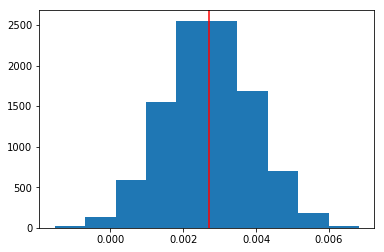

In [32]:
plt.hist(diff_means);
plt.axvline(x=obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
""" To get above information, we need to use Normal Distribution from bootstrapped mean's Standard Deviation"""
std_dev = np.std(diff_means)
std_dev

0.001201963869143632

In [34]:
null_mean = 0 # Closest Value between null and alternative Hypothesis
null_vals = np.random.normal(loc=null_mean, scale=std_dev, size=10000)

In [35]:
upper_bound = obs_diff
lower_bound = 0 - (obs_diff - 0)

right_side = (null_vals > upper_bound).mean()
left_side = (null_vals < lower_bound ).mean()

p_value_abtest = left_side + right_side
p_value_abtest

0.0241

In [36]:
right_side

0.0115

In [37]:
left_side

0.0126

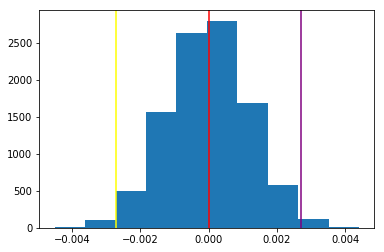

In [38]:
plt.hist(null_vals);
plt.axvline(x=null_mean, color = 'red');
plt.axvline(x=upper_bound, color = 'purple');
plt.axvline(x=lower_bound, color = 'yellow');

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In Part j, We conducted A/B Testing to compute p-Value (Critical Value). p-value is the probability of measuring extreme statistics, when null is True.
We used bootstrapping method to conduct this A/B Testing.** 

**With Large p-value (greater than alpha 0.05), tells us it is "likely" that we would observe an extreme statistic in the direction of HA if the null hypothesis were true. Therefore, our initial assumption that the null hypothesis is true must be correct. So, the new page have not produced any significant conversion or its performing same as old page.**

Reference: [P-Value Conclusion](https://onlinecourses.science.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/p-value-approach)

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = sum(new_page_converted)
convert_new = sum(old_page_converted)
n_old = len(old_page_converted)
n_new = len(new_page_converted)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value_ztest = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],   alternative='two-sided', prop_var=False)
z_score, p_value_ztest

(-2.2987600179751646, 0.021518570330941428)

In [41]:
from scipy.stats import norm

"To get the significance of z-score"
norm.cdf(z_score)

0.010759285165470714

In [42]:
"# Tells us what our critical value at 95% confidence is"
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations. Since the Z-Score (0.9295) is within the range of -1.96 and 1.96, we can expect a high p-value (0.352). Hence we failed to reject the Null Hypothesis**

**p-value (0.3191) from A/B Testing is similar to p-value from Z-Test(0.352)**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression** - Since we are not expect a quantitative value (predictor) and wanted a probabilitic outcome (range 0 - 1), we need to use Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2['intercept'] = 1
df2['ab_page'] = np.where(df2['landing_page'] == 'new_page', 1, 0)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 21 Oct 2018   Pseudo R-squ.:               8.077e-06
Time:                        10:18:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

Based on the above values, Users have 0.137 times conversion when they receive an old page. Since the p-value of 'ab_page' is large, then its not statistically signficant to be included in our model.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

In Regression, Null and Alternate Hypothesis (for Intercept) are defined as below.

$$H_0: \beta_{0} = 0 $$
$$H_1: \beta_{0} \neq 0 $$

where $\beta_{0}$ is defined as the predicted value, when independent variable is zero.

Null and Alternate Hypothesis (for Slope) are defined as below.

$$H_0: \beta_{1} = 0 $$
$$H_1: \beta_{1} \neq 0 $$

where $\beta_{1}$ is defined as the predicted value, when independent variable changes by 1 unit.

In A/B Testing, p-value is based on the mean difference. In Regression, its based on Slope and Intercept.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [46]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0


In the above model, 'timestamp' data is available, we can check whether weekday or weekend affects the conversion change.

First let's check convert the timestamp to datetime data type and identify whether its weekday or weekend

In [47]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['weekdayname'] = df2.timestamp.dt.day_name()
df2['isweekend'] = np.where(( (df2['weekdayname'] == "Saturday" )| (df2['weekdayname'] == "Sunday")), 1, 0)

In [48]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,weekdayname,isweekend
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,Saturday,1


In [49]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'isweekend']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366121
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 21 Oct 2018   Pseudo R-squ.:               1.154e-08
Time:                        10:18:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.9605
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9964      0.007   -297.554      0.000      -2.010      -1.983
isweekend      0.0006      0.013      0.050      0.960      -0.024       0.026
==============================================================================
"""

In [50]:
np.exp(results.params)

intercept    0.135820
isweekend    1.000635
dtype: float64

During Weekend, for every 1 unit increase, the User conversion increases by 1.0006 times, holding all other variables constant.

From the above results, the p-value for 'isweekend' is very high, suggesting weekend or weeday are not statistically significant for user conversion.

**We can also combine 'isweekend' and 'ab_page' to check how new page & weekend impacting the user conversion.**

In [51]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'isweekend', 'ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 21 Oct 2018   Pseudo R-squ.:               8.087e-06
Time:                        10:18:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.4230
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9889      0.009   -226.066      0.000      -2.006      -1.972
isweekend      0.0006      0.013      0.047      0.962      -0.025       0.026
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [52]:
np.exp(results.params)

intercept    0.136840
isweekend    1.000607
ab_page      0.985124
dtype: float64

From the p-value of the co-efficients and expontential values of co-efficients, User conversion is not affected significantly by the introduction of new page and on which day, they decided to convert.

Also, the results are very similar to previous models (ie. Model 1 - New Page Alone and Model 2 - Week End Alone)

**We can also check whether an introduction of interaction term (ab_page and weekend) improves our prediction.**

In [53]:
df2['weekend_ab_page'] = df2['isweekend'] * df2['ab_page']

lm = sm.Logit(df2['converted'], df2[['intercept', 'isweekend', 'ab_page', 'weekend_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 21 Oct 2018   Pseudo R-squ.:               2.073e-05
Time:                        10:18:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2204
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -1.9947      0.009   -210.235      0.000      -2.013      -1.976
isweekend           0.0214      0.018      1.189      0.234      -0.014       0.057
ab_page            -0.0035      0.013     -0.259      0.796      -0.030       0.023
weekend_ab_page    -0.0420      0.026     -1.640      0.101      -0.092       0.008
===================================================================================
"""

In [54]:
np.exp(results.params)

intercept          0.136056
isweekend          1.021632
ab_page            0.996536
weekend_ab_page    0.958822
dtype: float64

From the above summaries, it seems, 'Weekend' and 'New Page' are not statistically significant to impact the user conversion, because of the high p-values. Also interpreting the above results is not easy.

Disadvantages of multiple terms in our model:

- Linear Relationship may not exists.
- Non-constant Variance.
- Correlated errors.
- Outliers
- Multi-Colinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

converted,country,group,0,1,conversion_ratio
0,CA,control,6343,855,0.118783
1,CA,treatment,6484,817,0.111902
2,UK,control,31996,4364,0.120022
3,UK,treatment,31731,4375,0.121171
4,US,control,89446,12270,0.120630
5,US,treatment,89831,12072,0.118466


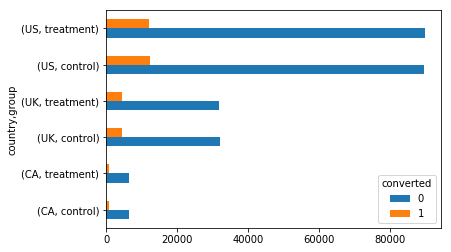

In [55]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

#We can quickly check conversion rate by countries using bar plot.
df_new.groupby(['country', 'group']).converted.value_counts().unstack().plot.barh();
df_new_grp = df_new.groupby(['country', 'group']).converted.value_counts().unstack().reset_index()
df_new_grp['conversion_ratio'] = df_new_grp[1]/(df_new_grp[1] + df_new_grp[0])
df_new_grp

From the above plot, it seems conversion rate for different countries almost look similar for both treatment and control groups.

In [56]:
### Fit Your Linear Model And Obtain the Results
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'CA','UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 21 Oct 2018   Pseudo R-squ.:               1.521e-05
Time:                        10:18:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [57]:
np.exp(results.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

From the above results, the co-efficients (except p-value) have higher values, suggesting Countries does not have statictiscal influence on User Conversion.

- For Canada, every 1 unit increase, the User conversion increases 0.960 times holding all other variables constant.
- For UK, every 1 unit increase, the User conversion increases 1.0099 times holding all other variables constant.

In [58]:
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA','UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 21 Oct 2018   Pseudo R-squ.:               2.323e-05
Time:                        10:18:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [59]:
np.exp(results.params)

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

From the above results, the co-efficients (except intercept) have higher p-values suggesting, these lower order terms (countries, new page) does not have lot of impact of User Conversion.

The results are very similar to Country Model.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']

lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA','UK', 'CA_ab_page', 'UK_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 21 Oct 2018   Pseudo R-squ.:               3.482e-05
Time:                        10:18:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [61]:
np.exp(results.params)

intercept     0.137178
ab_page       0.979646
CA            0.982625
UK            0.994272
CA_ab_page    0.954198
UK_ab_page    1.031896
dtype: float64

After adding interaction terms, all the co-efficients (except intercept) have higher p-values. That means they are not statistically significance to affect the conversion rate. Also introduction of higher order terms, the results cannot be easily interpreted.

Our conclusion using Logistic Regression models suggests, that User's conversion rate is affected by the introduction of new page. New Page Impact is less than or equal to Old Page Impact. So, the business should continue using Old Page (unless there is a pratical significance i.e. Old Page is costlier to maintain).

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0